# Relatório Parcial : Maratona de Filmes

Aluno: Davi Reis Vieira de Souza

## Introdução

Queremos passar um final de semana assistindo ao máximo de filmes possível, mas há restrições quanto aos horários disponíveis e ao número de títulos que podem ser vistos em cada categoria (comédia, drama, ação, etc).

**Entrada**: Um inteiro N representando o número de filmes disponíveis para assistir e N trios de inteiros (H[i], F[i], C[i]), representando a hora de início, a hora de fim e a categoria do i-ésimo filme. Além disso, um inteiro M representando o número de categorias e uma lista de M inteiros representando o número máximo de filmes que podem ser assistidos em cada categoria.

**Saída**: Um inteiro representando o número máximo de filmes que podem ser assistidos de acordo com as restrições de horários e número máximo por categoria.

Abaixo, temos o seguinte exemplo de *input*:

```txt
10 4
1 3 1 2 
11 13 3
14 15 3
10 16 2
```

Como ler esse arquivo?

- A primeira linha indica que há 10 filmes a serem considerados e 4 categorias;
- a segunda linha indica qual o máximo de filmes que cada categoria pode ter;
- da terceira linha em diante você vai encontrar os n filmes, suas respectivas hora de início, hora de término e categoria pertencente.

## Objetivo

O objetivo do projeto é conseguir agrupar o máximo de filmes que podem ser assistidos em um dia conforme as instruções e as instruções dadas.

## Heurística Gulosa e Aleatorização

### Heuristica Gulosa

A heurística gulosa é um algoritmo que resolve problemas de otimização tentando encontrar a melhor solução possível em cada etapa, sem olhar para o resultado final. No caso do problema da *Maratona de Filmes*, a heurística gulosa funciona da seguinte forma:

- Ordena os filmes em ordem crescente do horário de fim;
- Aplicaam-se as restrições e escolhe-se o primeiro filme que as possuiam de acordo com os horários de fim;
- Quando não houver mais espaço livre na *Maratona*, a heurística termina.

A heurística gulosa é usada para encontrar soluções ótimas em problemas de otimização, mas nem sempre garante a melhor solução. No entanto, é útil para problemas grandes em que encontrar a solução ótima é difícil. O algoritmo pode ser modificado e combinado com outras técnicas para melhorar a qualidade da solução encontrada.





### Heuristica Gulosa com Aleatorização

Essa implementação consiste na adaptação da heurística gulosa de nosso projeto. A proposta é que modifiquemos a heurística gulosa de modo que ao longo da seleção de um filme você tenha 25% de chance de pegar outro filme qualquer que respeite o horário. Isso fará com que sua heurística tenha um pouco mais de exploration e possamos ter alguns resultados melhores.

## O Código

### Heuristica Gulosa

Abaixo, a explicação por partes principais do código:

#### Bibliotecas

```cpp
#include <iostream>
#include <vector>
#include <algorithm>
#include <iomanip>
#include <bitset>
```

São as bibliotecas padrões da linguagem C++. `iostream` é para entrada e saída de dados, ``vector`` é para armazenar listas de objetos, ``algorithm`` é para algoritmos de ordenação e outras operações em contêineres, ``iomanip`` é para manipulação de fluxos de saída e ``bitset`` é para manipulação de bits.

#### Estruturas de Dados

```cpp
struct Filme {
    int id;
    int inicio;
    int fim;
    int categoria;
    std::bitset<24> horario;
};

struct Categoria {
    int id;
    int quantidade;
};

struct Maratona {
    std::bitset<24> disponibilidade;
    std::vector<Filme> filmes;
};
```

São as estruturas de dados utilizadas no código. A estrutura ``Filme`` armazena as informações de cada filme, como id, horário de início e fim e categoria. A estrutura ``Categoria`` armazena o id e a quantidade de filmes de cada categoria. A estrutura ``Maratona`` armazena a disponibilidade de horários da maratona e os filmes selecionados.

#### Funções Auxiliares

```cpp
std::bitset<24> gera_horario(int inicio, int fim) {
    std::bitset<24> horario;

    if (inicio == fim) {
        horario.set(inicio);
        return horario;
    }
    
    for (int i = inicio; i < fim; i++) {
        horario.set(i);
    }

    return horario;
}

bool compara_filme(Filme a, Filme b) {
    return a.fim < b.fim;
}
```

A função ``gera_horario`` recebe o horário de início e fim de um filme e retorna um std::bitset<24> com os bits correspondentes ao horário ocupado pelo filme. A função ``compara_filme`` é utilizada para ordenar os filmes de acordo com o horário de fim, em ordem crescente.

#### Função Principal

```cpp
int main() {
    int n, m;
    cin >> n >> m; // lê o número de filmes e de categorias
    vector<Filme> filmes(n); // cria um vetor de filmes com tamanho n
    vector<Categoria> categorias(m); // cria um vetor de categorias com tamanho m
    Maratona maratona; // cria uma maratona

    // Lê a quantidade de filmes de cada categoria
    for (int i = 0; i < m; i++) {
        cin >> categorias[i].quantidade;
        categorias[i].id = i + 1;
    }

    // Lê as informações dos filmes
    for (int i = 0; i < n; i++) {
        int inicio, fim, categoria;
        cin >> inicio >> fim >> categoria;

        // Se o horário de início é maior que o horário de fim,
        // significa que o filme se estende até o dia seguinte
        if (inicio > fim) {
            if (fim == 0) {
                fim = 24;
            } else if (inicio == -1 || fim == -1) {
                continue; // Ignora filmes com horários inválidos
            } else {
                continue; // Ignora filmes com horários inválidos
            }
        }

        // Cria um filme com as informações lidas
        Filme filme;
        filme.id = i + 1;
        filme.inicio = inicio;
        filme.fim = fim;
        filme.categoria = categoria;
        filme.horario = gera_horario(inicio, fim);

        // Adiciona o filme ao vetor de filmes
        filmes.push_back(filme);
    }

    // Ordena os filmes por ordem crescente de horário de fim
    sort(filmes.begin(), filmes.end(), compara_filme);

    // Chama a função que implementa a heurística gulosa para encontrar a programação da maratona
    heuristica_gulosa(filmes, categorias, maratona);

    return 0;
}
```

#### Heurística Gulosa

A função ``heuristica_gulosa`` implementa uma heurística gulosa para encontrar a maior quantidade possível de filmes em uma maratona de acordo com a disponibilidade e a categoria de cada filme.

A função recebe três argumentos: ``filmes``, um vetor contendo todos os filmes a serem considerados na maratona; ``categorias``, um vetor de estrutura ``Categoria`` que contém informações sobre a quantidade de filmes que podem ser selecionados para cada categoria; e ``maratona``, uma estrutura que contém um vetor de filmes selecionados e uma ``bitset`` representando a disponibilidade de horários na maratona.

A função começa definindo a variável ``maximo`` como 0, que será atualizada com a quantidade máxima de filmes selecionados para a maratona. Em seguida, um loop é executado para cada filme em ``filmes``.

Para cada filme, a função verifica se a categoria desse filme já teve a quantidade máxima de filmes selecionados, caso tenha, o filme é pulado e o loop continua. Caso contrário, a função verifica se a disponibilidade de horários da maratona é 0 (ou seja, nenhum filme foi selecionado até agora). Se for esse o caso, a disponibilidade de horários é atualizada com a disponibilidade do horário do filme e o filme é adicionado ao vetor de filmes selecionados na maratona. A quantidade de filmes da categoria correspondente é decrementada e a variável ``maximo`` é incrementada.

Caso a disponibilidade de horários da maratona já tenha sido definida, a função verifica se a disponibilidade do horário do filme selecionado não entra em conflito com a disponibilidade dos horários dos filmes já selecionados. Isso é feito usando a operação bit a bit "AND" entre as disponibilidades de horário do filme e da maratona. Se o resultado for 0, significa que os horários não entram em conflito e o filme pode ser adicionado. Caso contrário, o filme é pulado.

Por fim, a função imprime o valor de ``maximo``, que representa a quantidade de filmes selecionados para a maratona, e imprime as informações dos filmes selecionados: seu id, horário de início e horário de fim.

## Aleatoriedade

O código da estratégia de Aleatorização se diferencia somente na função main e o uso da nova função ``aleatoriedade``.

#### Função Principal

```cpp
int main() {
    int n, m;
    cin >> n >> m; // Lê o número de filmes (n) e o número de categorias (m)

    vector<Filme> filmes; // Vetor que armazenará os filmes
    vector<Categoria> categorias(m); // Vetor que armazenará as categorias
    Maratona maratona; // Objeto que representará a maratona

    // Lê a quantidade de filmes para cada categoria e inicializa o id de cada categoria
    for (int i = 0; i < m; i++) {
        cin >> categorias[i].quantidade;
        categorias[i].id = i + 1;
    }

    // Lê as informações dos filmes e gera a lista de filmes
    for (int i = 0; i < n; i++) {
        int inicio, fim, categoria;
        cin >> inicio >> fim >> categoria;

        // Trata casos em que o horário do filme é inválido
        if (inicio > fim) {
            if (fim == 0){
                fim = 24;
            } else if (inicio == -1 || fim == -1) {
                continue;
            } else {
                continue;
            }
        }

        Filme filme;
        filme.id = i + 1;
        filme.inicio = inicio;
        filme.fim = fim;
        filme.categoria = categoria;
        filme.horario = gera_horario(inicio, fim);

        filmes.push_back(filme);
    }

    sort(filmes.begin(), filmes.end(), compara_filme); // Ordena os filmes por horário de término

    int size_of_filmes = filmes.size();

    map<int, vector<Filme>> filmes_por_horario; // Mapa que armazenará os filmes por horário

    // Separa os filmes por horário de término
    for (int i = 0; i < size_of_filmes; i++) {
        filmes_por_horario[filmes[i].fim].push_back(filmes[i]);
    }

    // Realiza a escolha aleatória dos filmes para a maratona
    aleatoriedade(categorias, maratona, filmes_por_horario);

    return 0;
}
```

#### Aleatoriedade

A função ``aleatoriedade`` é responsável por gerar uma maratona aleatória de filmes que se encaixam dentro dos horários disponíveis e ainda respeitam a quantidade de filmes por categoria.

Primeiramente, a função gera uma seed aleatória baseada no tempo atual para ser usada no gerador de números aleatórios. Em seguida, é criada uma distribuição binomial com probabilidade de sucesso de 0.75, que será usada para determinar se um filme disponível no horário será escolhido ou não.

A partir daí, é feito um loop pelos 24 horários possíveis. Se a maratona já estiver cheia, o loop é interrompido. Se não houver filmes disponíveis no horário atual, o loop segue para o próximo horário. Caso contrário, a função verifica se há algum filme que se encaixa no horário e que ainda não foi escolhido para a maratona, e que ainda tem disponibilidade na sua categoria.

Se houver pelo menos um filme que atenda a esses critérios, a função utiliza a distribuição binomial criada anteriormente para escolher se o filme será adicionado ou não à maratona. Caso o filme seja escolhido, sua disponibilidade de horários é adicionada à disponibilidade da maratona, e ele é adicionado à lista de filmes da maratona. A quantidade de filmes da sua categoria é reduzida em 1.

Por fim, a função imprime a quantidade de filmes na maratona, seguida da lista de filmes, com seus respectivos IDs, horários de início e fim.

## Valgrind

In [2]:
!sudo apt-get install valgrind

[sudo] password for davirvs: 


### Heurística Gulosa

In [11]:
!valgrind --tool=callgrind --vgdb=no ./gulosa < input-10k.txt  > gulosa_output_valgrind.txt

==8439== Callgrind, a call-graph generating cache profiler
==8439== Copyright (C) 2002-2017, and GNU GPL'd, by Josef Weidendorfer et al.
==8439== Using Valgrind-3.15.0 and LibVEX; rerun with -h for copyright info
==8439== Command: ./gulosa
==8439== 
==8439== For interactive control, run 'callgrind_control -h'.
==8439== 
==8439== Events    : Ir
==8439== Collected : 44952844
==8439== 
==8439== I   refs:      44,952,844


In [13]:
!callgrind_annotate callgrind.out.8439 gulosa.cpp 

--------------------------------------------------------------------------------
Profile data file 'callgrind.out.8439' (creator: callgrind-3.15.0)
--------------------------------------------------------------------------------
I1 cache: 
D1 cache: 
LL cache: 
Timerange: Basic block 0 - 9236999
Trigger: Program termination
Profiled target:  ./gulosa (PID 8439, part 1)
Events recorded:  Ir
Events shown:     Ir
Event sort order: Ir
Thresholds:       99
Include dirs:     
User annotated:   gulosa.cpp
Auto-annotation:  off

--------------------------------------------------------------------------------
Ir         
--------------------------------------------------------------------------------
44,952,844  PROGRAM TOTALS

--------------------------------------------------------------------------------
Ir         file:function
--------------------------------------------------------------------------------
8,078,213  ???:std::istreambuf_iterator<char, std::char_traits<char> > std::num_get<

### Aleatoriedade 

In [ ]:
!valgrind --tool=callgrind --vgdb=no ./aleatoriedade < input-10k.txt  > aleatoriedade_output_valgrind.txt

In [ ]:
!callgrind_annotate callgrind.out.8439 aleatoriedade.cpp 

## Comparações

Antes, é importante realizar o entendimento a seguir:

### Arquivos de Input

Todos os arquivos de input possuem 100 categorias.

- **input-1k.txt**: contém 1000 filmes.
- **input-10k.txt**: contém 10000 filmes.
- **input-100k.txt**: contém 100000 filmes.
- **input-1m.txt**: contém 1000000 filmes.
- **input-10m.txt**: contém 10000000 filmes.
- **input-100m.txt**: contém 100000000 filmes.

### Compilação

- g++ -Wall -O3 -g gulosa.cpp -o gulosa
- g++ -Wall -O3 -g aleatoriedade.cpp -o aleatoriedade

### Execução

Exemplos: 
- ./gulosa < input-1k.txt > output-gulosa-1k.txt
- ./aleatoriedade < input-1k.txt > output-aleatoriedade-1k.txt

In [44]:
import time
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
data = {
    'gulosa' : {
        'input-1k.txt': {
            'tempo': [],
            'memoria': []
        },
        'input-10k.txt': {
            'tempo': [],
            'memoria': []
        },
        'input-100k.txt': {
            'tempo': [],
            'memoria': []
        },
        'input-10k.txt': {
            'tempo': [],
            'memoria': []
        },
        'input-1m.txt': {
            'tempo': [],
            'memoria': []
        },
        'input-10k.txt': {
            'tempo': [],
            'memoria': []
        },
        'input-10m.txt': {
            'tempo': [],
            'memoria': []
        },
        'input-10k.txt': {
            'tempo': [],
            'memoria': []
        },
        'input-100m.txt': {
            'tempo': [],
            'memoria': []
        },
        'input-10k.txt': {
            'tempo': [],
            'memoria': []
        },
    },
    'aleatoriedade': {
        'input-1k.txt': {
            'tempo': [],
            'memoria': []
        },
        'input-10k.txt': {
            'tempo': [],
            'memoria': []
        },
        'input-100k.txt': {
            'tempo': [],
            'memoria': []
        },
        'input-10k.txt': {
            'tempo': [],
            'memoria': []
        },
        'input-1m.txt': {
            'tempo': [],
            'memoria': []
        },
        'input-10k.txt': {
            'tempo': [],
            'memoria': []
        },
        'input-10m.txt': {
            'tempo': [],
            'memoria': []
        },
        'input-10k.txt': {
            'tempo': [],
            'memoria': []
        },
        'input-100m.txt': {
            'tempo': [],
            'memoria': []
        },
        'input-10k.txt': {
            'tempo': [],
            'memoria': []
        },
    }
}

In [56]:
def number_of_movies(file):
    with open(file, 'r') as f:
        line = f.readline().split()
        return int(line[0])

In [57]:
for algoritmo in data:
    for arquivo in data[algoritmo]:
        for i in range(10):
            print(f'{algoritmo} - {arquivo} - {i+1}/10')
            output_name = str(i) + '_' + arquivo.split('-')[1]
            start_time = time.time()
            !./{algoritmo} < inputs/{arquivo} > outputs/{algoritmo}_output_{output_name}
            end_time = time.time() - start_time
            print('\tTime:', end_time)
            data[algoritmo][arquivo]['tempo'].append(end_time)
            data[algoritmo][arquivo]['memoria'].append(number_of_movies(f'outputs/{algoritmo}_output_{output_name}'))           

gulosa - input-1k.txt - 1/10
	Time: 0.19286370277404785
gulosa - input-1k.txt - 2/10
	Time: 0.184403657913208
gulosa - input-1k.txt - 3/10
	Time: 0.19925260543823242
gulosa - input-1k.txt - 4/10
	Time: 0.19602394104003906
gulosa - input-1k.txt - 5/10
	Time: 0.17762494087219238
gulosa - input-1k.txt - 6/10
	Time: 0.1943502426147461
gulosa - input-1k.txt - 7/10
	Time: 0.18280982971191406
gulosa - input-1k.txt - 8/10
	Time: 0.19126224517822266
gulosa - input-1k.txt - 9/10
	Time: 0.2019803524017334
gulosa - input-1k.txt - 10/10
	Time: 0.2075796127319336
gulosa - input-10k.txt - 1/10
	Time: 0.19771170616149902
gulosa - input-10k.txt - 2/10
	Time: 0.20183920860290527
gulosa - input-10k.txt - 3/10
	Time: 0.19663214683532715
gulosa - input-10k.txt - 4/10
	Time: 0.2091667652130127
gulosa - input-10k.txt - 5/10
	Time: 0.19667840003967285
gulosa - input-10k.txt - 6/10
	Time: 0.21212482452392578
gulosa - input-10k.txt - 7/10
	Time: 0.20387029647827148
gulosa - input-10k.txt - 8/10
	Time: 0.2139503

In [58]:
# json save
import json

with open('data.json', 'w') as fp:
    json.dump(json.dumps(data, indent=2), fp)

In [59]:
# organizar dados em um dataframe

df = pd.DataFrame(columns=['algoritmo', 'arquivo', 'tentativa', 'tempo', 'memoria'])

for algoritmo in data:
    for arquivo in data[algoritmo]:
        for i in range(10):
            df = df.append({
                'algoritmo': algoritmo,
                'arquivo': arquivo,
                'tentativa': i,
                'tempo': data[algoritmo][arquivo]['tempo'][i],
                'memoria': data[algoritmo][arquivo]['memoria'][i]
            }, ignore_index=True)
df

/tmp/ipykernel_9606/855219930.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_9606/855219930.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_9606/855219930.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_9606/855219930.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_9606/855219930.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_9606/855219930.py:8: FutureWarning: The frame

,algoritmo,arquivo,tentativa,tempo,memoria
0,gulosa,input-1k.txt,0,0.192864,22
1,gulosa,input-1k.txt,1,0.184404,22
2,gulosa,input-1k.txt,2,0.199253,22
3,gulosa,input-1k.txt,3,0.196024,22
4,gulosa,input-1k.txt,4,0.177625,22
...,...,...,...,...,...
115,aleatoriedade,input-100m.txt,5,28.790314,23
116,aleatoriedade,input-100m.txt,6,28.295407,23
117,aleatoriedade,input-100m.txt,7,29.297941,24
118,aleatoriedade,input-100m.txt,8,26.927765,23


In [60]:
df.to_csv('data.csv', index=False)

In [61]:
df.head(10)

,algoritmo,arquivo,tentativa,tempo,memoria
0,gulosa,input-1k.txt,0,0.192864,22
1,gulosa,input-1k.txt,1,0.184404,22
2,gulosa,input-1k.txt,2,0.199253,22
3,gulosa,input-1k.txt,3,0.196024,22
4,gulosa,input-1k.txt,4,0.177625,22
5,gulosa,input-1k.txt,5,0.194350,22
6,gulosa,input-1k.txt,6,0.182810,22
7,gulosa,input-1k.txt,7,0.191262,22
8,gulosa,input-1k.txt,8,0.201980,22
9,gulosa,input-1k.txt,9,0.207580,22


### Média de Tempo por arquivo por algoritmo

In [62]:
df_mean = df.groupby(['algoritmo', 'arquivo']).mean().reset_index()
df_mean

/tmp/ipykernel_9606/3458201290.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = df.groupby(['algoritmo', 'arquivo']).mean().reset_index()


,algoritmo,arquivo,tempo
0,aleatoriedade,input-100k.txt,0.253979
1,aleatoriedade,input-100m.txt,28.399411
2,aleatoriedade,input-10k.txt,0.203455
3,aleatoriedade,input-10m.txt,5.606233
4,aleatoriedade,input-1k.txt,0.187378
5,aleatoriedade,input-1m.txt,0.746182
6,gulosa,input-100k.txt,0.245699
7,gulosa,input-100m.txt,32.278758
8,gulosa,input-10k.txt,0.203197
9,gulosa,input-10m.txt,6.205056


### Gráfico de tempo

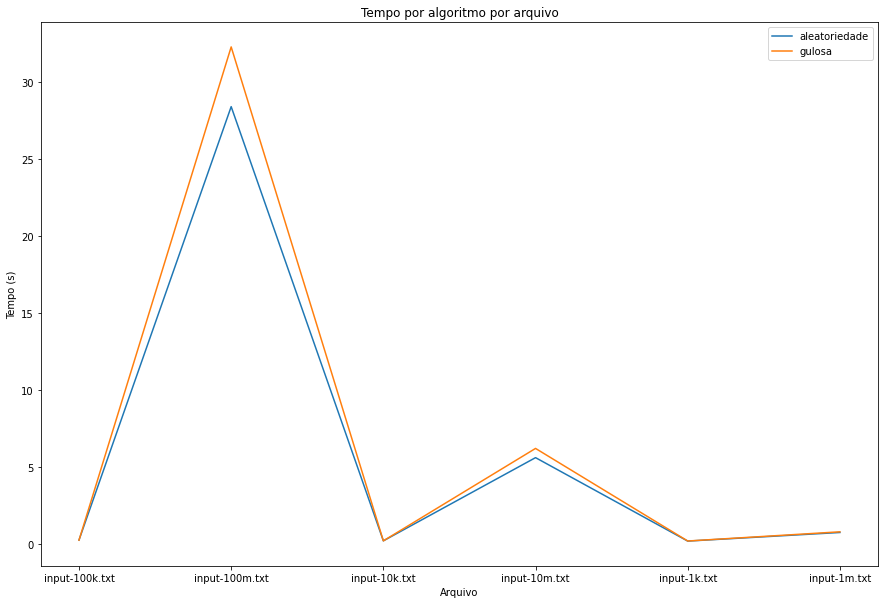

In [69]:
# grafico de tempo por algoritmo por arquivo

fig, ax = plt.subplots(figsize=(15, 10))
for algoritmo in df_mean['algoritmo'].unique():
    df_aux = df_mean[df_mean['algoritmo'] == algoritmo]
    ax.plot(df_aux['arquivo'], df_aux['tempo'], label=algoritmo)
ax.set_title('Tempo por algoritmo por arquivo')
ax.set_xlabel('Arquivo')
ax.set_ylabel('Tempo (s)')
ax.legend()
plt.show()

In [75]:
df_mean_movies = df.groupby(['algoritmo', 'arquivo','memoria']).mean('memoria').reset_index()
df_mean_movies

,algoritmo,arquivo,memoria,tempo
0,aleatoriedade,input-100k.txt,23,0.253979
1,aleatoriedade,input-100m.txt,23,28.527903
2,aleatoriedade,input-100m.txt,24,28.099596
3,aleatoriedade,input-10k.txt,22,0.202994
4,aleatoriedade,input-10k.txt,23,0.205300
5,aleatoriedade,input-10m.txt,23,5.617815
6,aleatoriedade,input-10m.txt,24,5.501992
7,aleatoriedade,input-1k.txt,20,0.188054
8,aleatoriedade,input-1k.txt,21,0.188465
9,aleatoriedade,input-1k.txt,22,0.185391


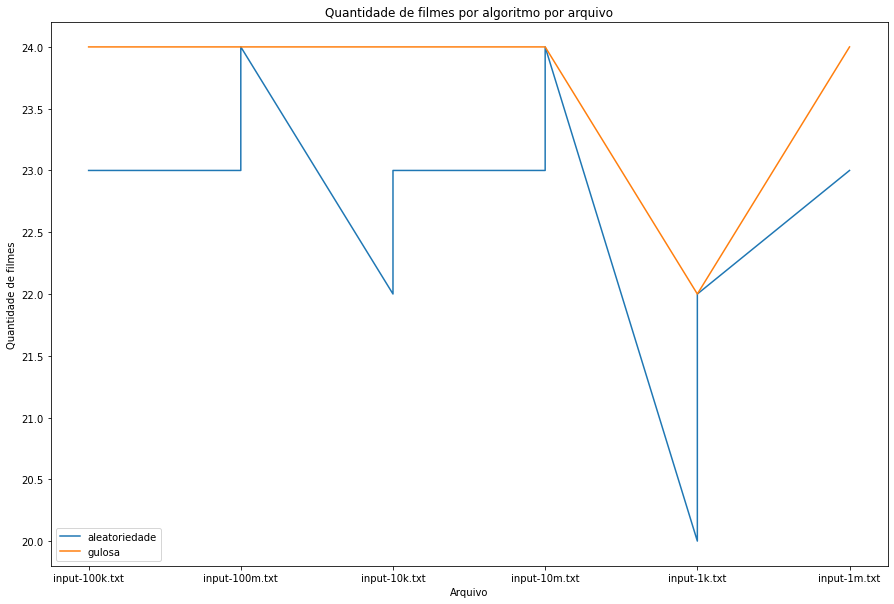

In [78]:
# quantidade de filmes por algoritmo por arquivo

fig, ax = plt.subplots(figsize=(15, 10))
for algoritmo in df_mean_movies['algoritmo'].unique():
    df_aux = df_mean_movies[df_mean_movies['algoritmo'] == algoritmo]
    ax.plot(df_aux['arquivo'], df_aux['memoria'], label=algoritmo)
ax.set_title('Quantidade de filmes por algoritmo por arquivo')
ax.set_xlabel('Arquivo')
ax.set_ylabel('Quantidade de filmes')
ax.legend()
plt.show()